In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
cat_features=['sex', 'cp', 'fbs', 'restecg', 'exang','slope', 'ca', 'thal', 'oldpeak']
num_features = ['age', 'trestbps', 'chol', 'thalach']

# Check for class imblance

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

observations:

The dataset is imbalanced, it is expected that the model will not perform good for class 0 data

# Spliting into train and test

In [9]:
# dependent and independent features
y = df.pop('target')
x = df

In [10]:
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)

# Scaling numerical features

In [11]:
# scale the numerical features
scaler = MinMaxScaler()
x_train[num_features] = scaler.fit_transform(x_train[num_features])
x_test[num_features] = scaler.transform(x_test[num_features])


In [12]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
77,0.581395,1,1,0.433962,0.216895,0,1,0.750000,1,0.0,2,0,2
109,0.372093,0,0,0.150943,0.292237,0,0,0.709677,0,0.0,2,0,2
230,0.302326,1,2,0.132075,0.267123,0,1,0.653226,0,0.0,2,0,2
226,0.651163,1,1,0.245283,0.353881,0,0,0.258065,0,1.4,1,1,3
46,0.232558,1,2,0.433962,0.248858,0,0,0.879032,0,0.0,2,0,2


# Training Random Forest Classifier

In [3]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10)
clf.fit(x_train,y_train)

NameError: name 'RandomForestClassifier' is not defined

# Evaluting Performance

In [14]:
y_pred = clf.predict(x_test)

In [15]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        42
           1       0.81      0.86      0.83        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



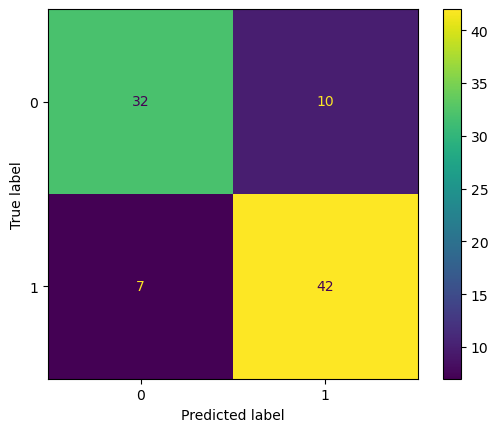

In [16]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test)

plt.show()


observations:

As expected, the model is not performing well on the minority class (class 0)

# Feature important to find top 5 features

In [2]:
# get feature importances and sort them in descending order
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# print the top 5 features
print("Top 5 features:")
for i in range(5):
    print("%d. %s (%f)" % (i + 1, x_train.columns[indices[i]], importances[indices[i]]))

NameError: name 'clf' is not defined

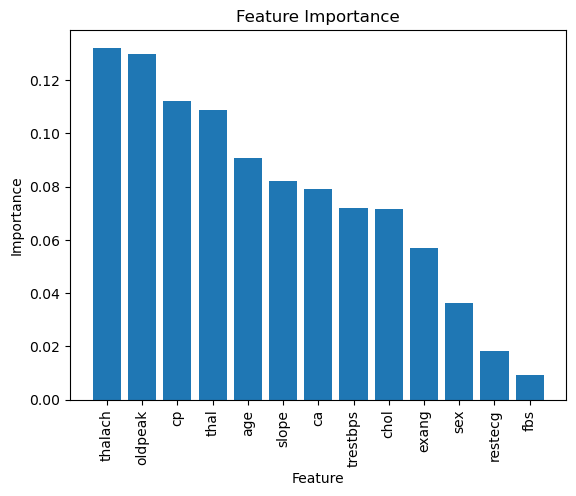

In [18]:
# plot feature importances in a bar chart
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Decision boundry of two of the most important features

In [1]:
# choose the two most important features
feature1, feature2 = importances.argsort()[-2:]
print(feature1, feature2)

NameError: name 'importances' is not defined

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train[['thalach','oldpeak']], y_train)

In [ ]:
# create a grid of points covering the range of the two features
x_min, x_max = x_train.iloc[:, feature1].min() - 1, x_train.iloc[:, feature1].max() + 1
y_min, y_max = x_train.iloc[:, feature2].min() - 1, x_train.iloc[:, feature2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# predict the class of each point in the grid
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the decision boundaries on a scatter plot of the two features
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_train.iloc[:, feature1], x_train.iloc[:, feature2], c=y_train, s=20, edgecolor='k')
plt.xlabel(x_train.columns[feature1])
plt.ylabel(x_train.columns[feature2])
plt.title('Random Forest Classifier Decision Boundaries')
plt.show()

Observation


Its hard to interpret the above decision boundry plot because the model trained for this plot was only trained on two features (the best features), and the model is having a hard time finding a concrete boundry between the two classed based on only two features. Because two features are not enough to separate one class from another properly.

Limitations and Insights

Well first of all there are only 303 samples in the dataset so its not enough for training a more accurate and robust model.
The dataset is imbalanced so the model will always perform bad on classfying the minority class (unless we handle it by using a technique like upsampling, downsampling or SMOTE etc.)
We're achieving 80 percent accuracy but like mentioned already the model is performing poorly on class 0 data and so i will never suggest such a model to be deployed without addressing the above mentioned issues.